# HYDRAD Timing Test

Compare results from two forks of HYDRAD.

In [1]:
import os,sys
import numpy as np
sys.path.append(os.path.join(os.environ['RESEARCH_DIR'],'hercules/hercules'))
import quick_look as ql
%matplotlib inline

/opt/anaconda3/lib/python3.4/site-packages/IPython/html.py:14: ShimWarning: The `IPython.html` package has been deprecated. You should import from `notebook` instead. `IPython.html.widgets` has moved to `ipywidgets`.
  "`IPython.html.widgets` has moved to `ipywidgets`.", ShimWarning)


<table>
    <tr>
        <th rowspan="2" align="center">Duration</th>
        <th rowspan="2" align="center">Loop length</th>
        <th colspan="3" align="center">Heating (1 event)</th>
        <th rowspan="2" align="center">NEI Elements</th>
    </tr>
    <tr>
        <th>Duration</th>
        <th>Magnitude</th>
        <th>Shape</th>
    </tr>
    <tr>
        <td>5000 s</td>
        <td>90 Mm</td>
        <td>100 s</td>
        <td>0.2 erg cm$^{-3}$ s$^{-1}$</td>
        <td>triangular</td>
        <td>Mg, Si, Ca, Fe</td>
    </tr>
</table>

| Version | Execution Time (s) | Execution Time (hrs) |
|:-------:|:--------------:|:----:|
| Original | 79474  | $\approx22$ |
| WTB Fork | 86335  | $\approx24$ |

$\Delta(t)\approx1.9$ hours. Not too bad considering the timescale of about 1 day. Some issues with the timestep as well. WTB Fork needs some more inspection.

Now let's plot the results and see how they compare. First, plot the loop profiles and timeseries for the original model.

The dashed lines represent the ion quantities. The colorbar runs from red ($t=0$ s) to blue ($t=5000$ s).

In [2]:
hydrad_original=ql.QuickViewer('/home/wtb2/Desktop/HYDRAD/Results/',figsize=(18,13),fontsize=22)

In [3]:
hydrad_original.load_results()

In [4]:
hydrad_original.make_timeseries()

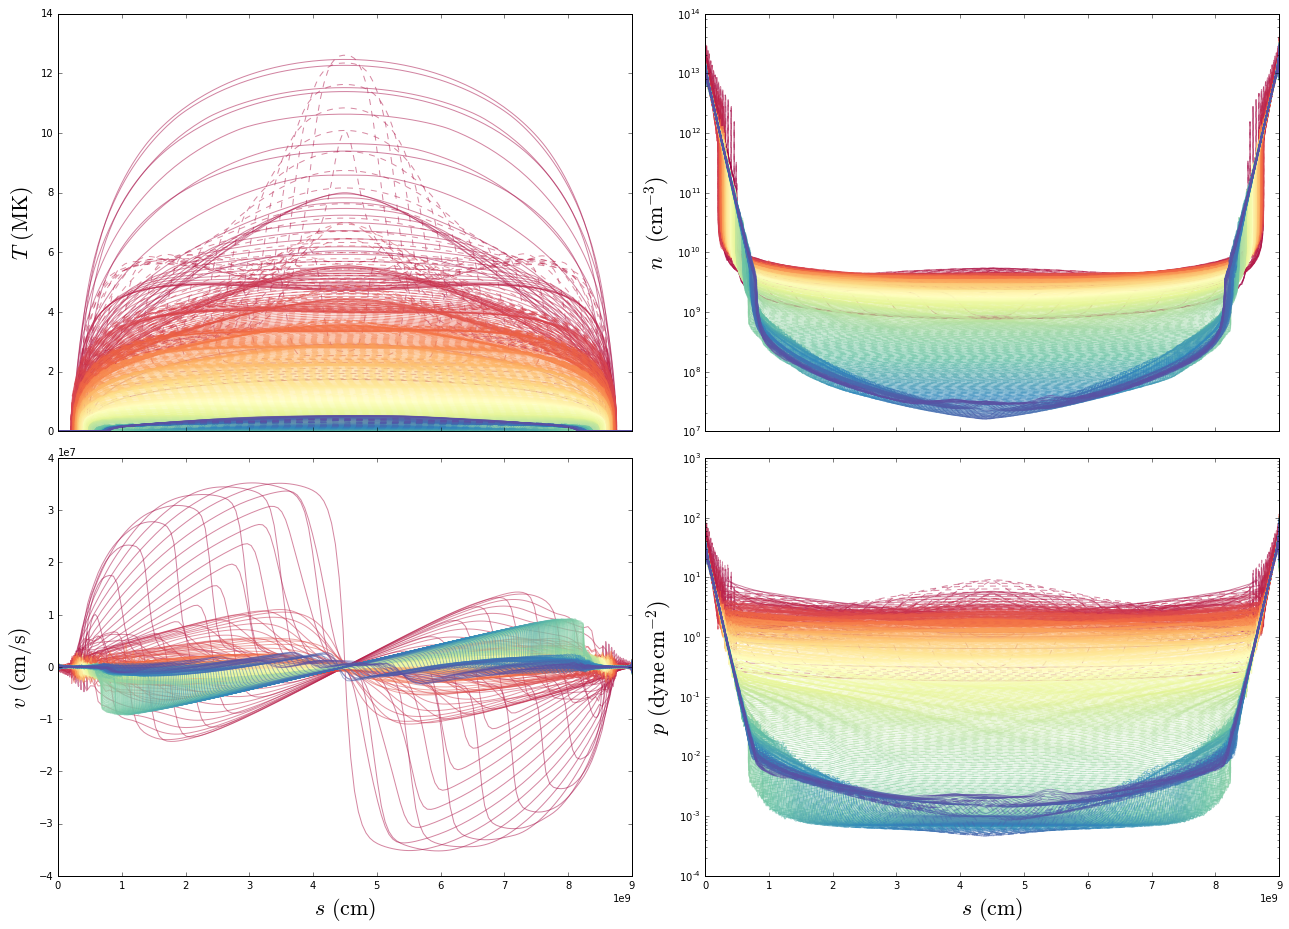

In [5]:
hydrad_original.plot_profile(line_cm='Spectral')

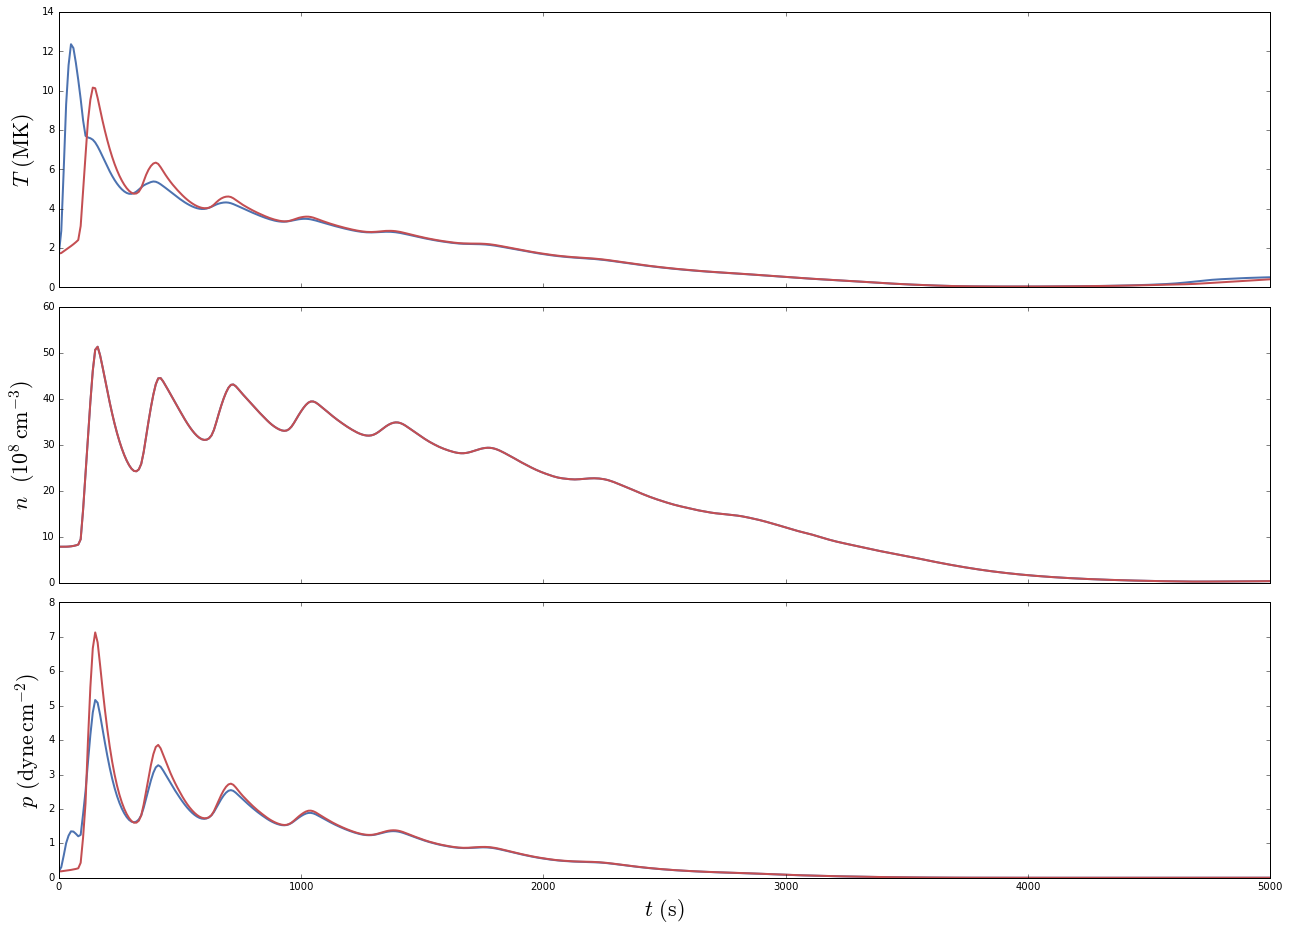

In [6]:
hydrad_original.plot_timeseries()

Now, plot the profiles and timeseries for the WTB Fork.

In [7]:
hydrad_fork=ql.QuickViewer('/home/wtb2/Documents/research_notebook/HYDRAD/test_runs/hydrad/',
                           figsize=(18,13),fontsize=22)

In [8]:
hydrad_fork.load_results()

In [9]:
hydrad_fork.make_timeseries()

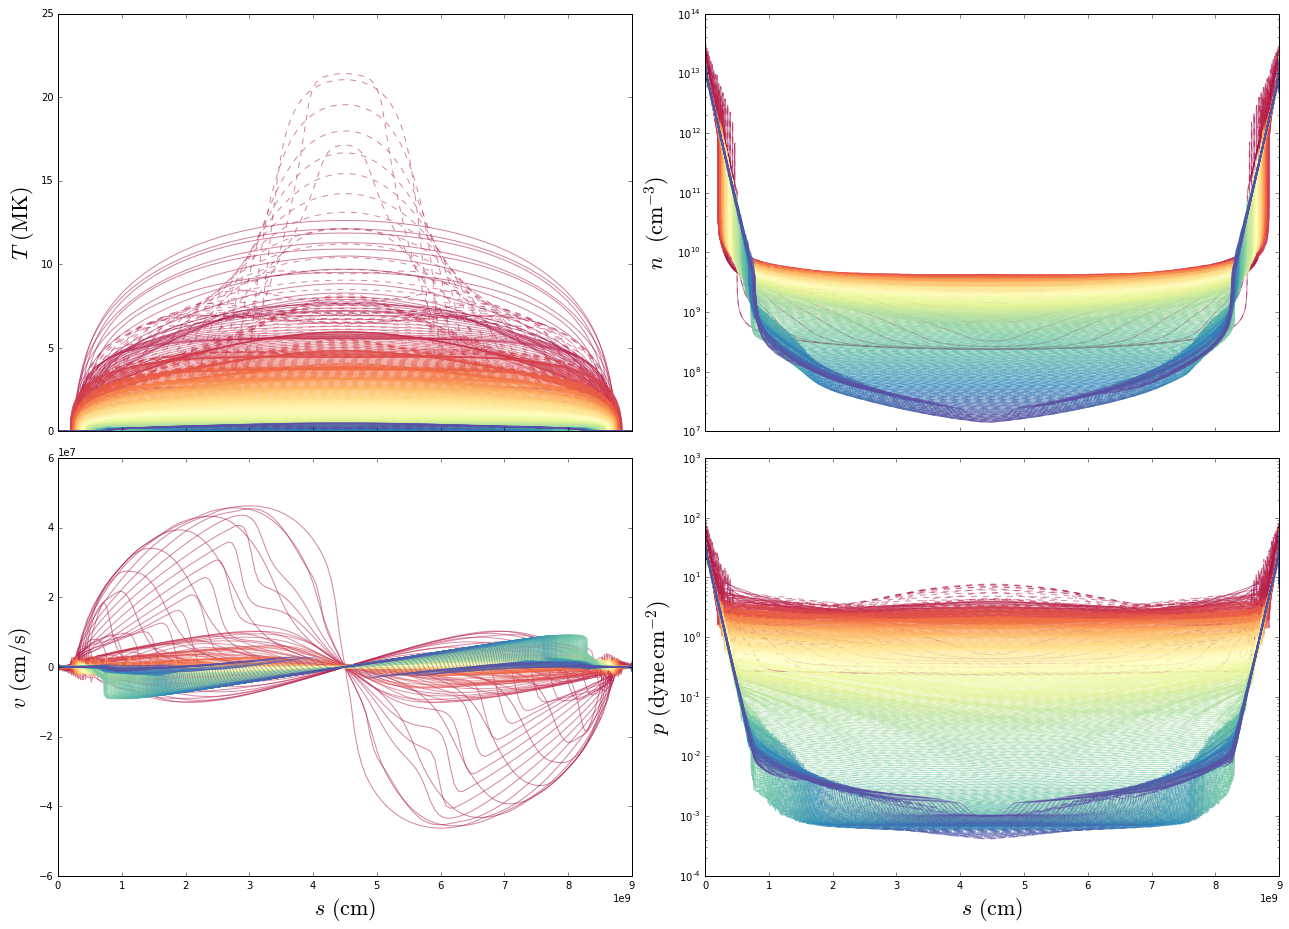

In [10]:
hydrad_fork.plot_profile(line_cm='Spectral')

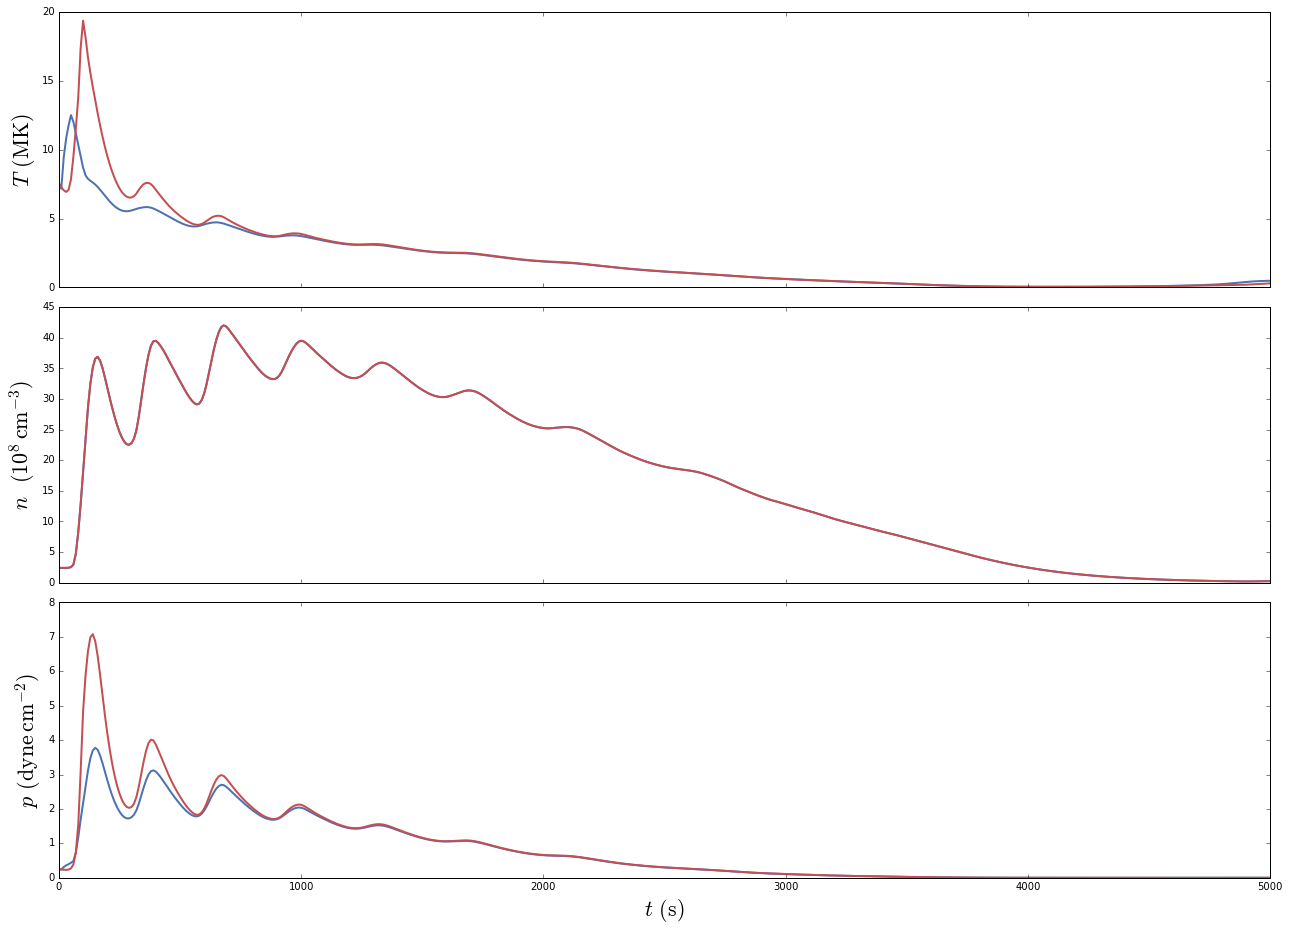

In [11]:
hydrad_fork.plot_timeseries()